In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv("processed-data/wheels.csv")

In [5]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [6]:
x=dados.drop("inadimplente", axis=1)
y=dados["inadimplente"]

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
modelo=DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [9]:
print(f"Acurácia: {modelo.score(x,y)*100:.2f}%")

Acurácia: 100.00%


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_validacao, y_train, y_validacao = train_test_split(x, y, stratify=y, random_state=5)

In [12]:
modelo=DecisionTreeClassifier()
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 100.00%
Acurácia de validação: 84.94%


In [13]:
modelo=DecisionTreeClassifier(max_depth=3)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.27%
Acurácia de validação: 91.27%


In [14]:
modelo=DecisionTreeClassifier(max_depth=5)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.34%
Acurácia de validação: 91.24%


In [15]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 92.06%
Acurácia de validação: 90.57%
Acurácia de validação: 90.57%


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_previsto = modelo.predict(x_validacao)
matriz_confusao = confusion_matrix(y_validacao, y_previsto)
print(matriz_confusao)

[[10356   123]
 [  960    42]]


In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

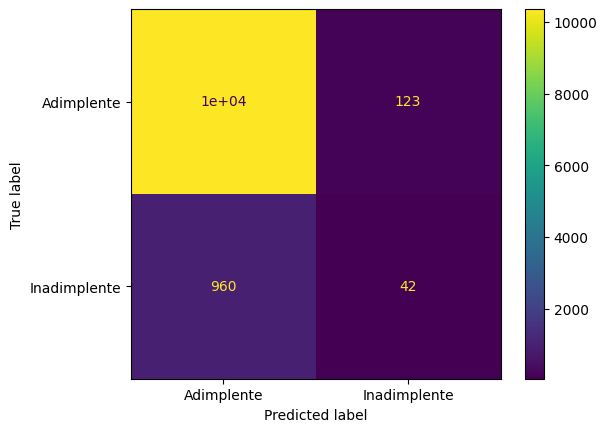

In [19]:
visualizador = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels="Adimplente Inadimplente".split())
visualizador.plot()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print(f"Acurácia: {accuracy_score(y_validacao, y_previsto)*100:.2f}%")

Acurácia: 90.57%


In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
print(f"Precisão: {precision_score(y_validacao, y_previsto)*100:.2f}%")
print(f"Recall: {recall_score(y_validacao, y_previsto)*100:.2f}%")

Precisão: 25.45%
Recall: 4.19%


In [24]:
from sklearn.metrics import f1_score

In [25]:
print(f"F1 Score: {f1_score(y_validacao, y_previsto)*100:.2f}%")

F1 Score: 7.20%


In [26]:
from sklearn.metrics import RocCurveDisplay

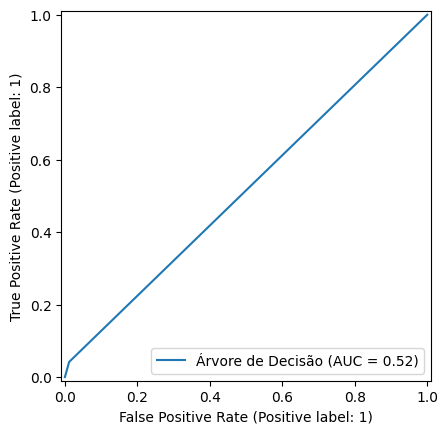

In [27]:
RocCurveDisplay.from_predictions(y_validacao, y_previsto, name="Árvore de Decisão");

In [28]:
from sklearn.metrics import roc_auc_score

In [30]:
print(f"AUC: {roc_auc_score(y_validacao, y_previsto)*100:.2f}%")

AUC: 51.51%


In [31]:
from sklearn.metrics import PrecisionRecallDisplay

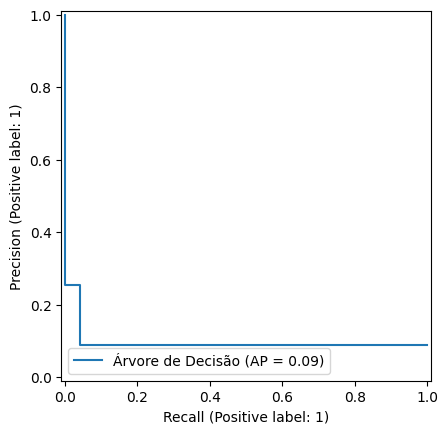

In [32]:
PrecisionRecallDisplay.from_predictions(y_validacao, y_previsto, name="Árvore de Decisão");

In [37]:
from sklearn.metrics import average_precision_score

In [40]:
print(f"AP: {average_precision_score(y_validacao, y_previsto)*100:.2f}%")

AP: 9.43%


In [41]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_validacao, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [45]:
from sklearn.model_selection import cross_validate, KFold

In [47]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=kf)
cv_results

{'fit_time': array([0.20219755, 0.18426037, 0.18574119, 0.18656945, 0.19044852]),
 'score_time': array([0.00333953, 0.00284958, 0.00305557, 0.00329018, 0.00208211]),
 'test_score': array([0.91333696, 0.90799216, 0.90755662, 0.91343641, 0.89960801])}

In [49]:
cv_results["test_score"]

array([0.91333696, 0.90799216, 0.90755662, 0.91343641, 0.89960801])

In [50]:
cv_results["test_score"].mean()

np.float64(0.9083860336027343)

In [52]:
media = cv_results["test_score"].mean()
desvio_padrao = cv_results["test_score"].std()
print(f"Acurácia média: {media*100:.2f}%")
print(f"Intervalo de confiança: {media*100:.2f}% ± {desvio_padrao*100:.2f}%")

Acurácia média: 90.84%
Intervalo de confiança: 90.84% ± 0.51%


In [54]:
def intervalo_conf(resultados):
    media = resultados["test_score"].mean()
    desvio_padrao = resultados["test_score"].std()
    print(f"Acurácia média: {media*100:.2f}%")
    print(f"Intervalo de confiança: [{media-2*desvio_padrao:.2f}, {min(media+2*desvio_padrao, 1):.2f}]")

In [56]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=kf, scoring="recall")
cv_results

{'fit_time': array([0.24895048, 0.19042706, 0.25246835, 0.19983792, 0.19215941]),
 'score_time': array([0.005445  , 0.00652504, 0.00760484, 0.00350761, 0.00453615]),
 'test_score': array([0.02642008, 0.01980198, 0.02091021, 0.01174935, 0.02427746])}

In [57]:
intervalo_conf(cv_results)

Acurácia média: 2.06%
Intervalo de confiança: [0.01, 0.03]


In [58]:
dados["inadimplente"].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [59]:
from sklearn.model_selection import StratifiedKFold

In [61]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=skf, scoring="recall")

In [62]:
cv_results

{'fit_time': array([0.20140362, 0.18505716, 0.17987204, 0.17846704, 0.19045758]),
 'score_time': array([0.00506544, 0.00510454, 0.00495386, 0.00330472, 0.00355339]),
 'test_score': array([0.03740648, 0.02746567, 0.03117207, 0.02618454, 0.02618454])}

In [63]:
intervalo_conf(cv_results)

Acurácia média: 2.97%
Intervalo de confiança: [0.02, 0.04]


In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
oversample = SMOTE()
x_resampled, y_resampled = oversample.fit_resample(x, y)

In [74]:
y_resampled.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [75]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x_resampled, y_resampled, cv=skf, scoring="recall")

In [76]:
intervalo_conf(cv_results)

Acurácia média: 73.48%
Intervalo de confiança: [0.70, 0.77]
